In [2]:
from typing import Set
from dataclasses import asdict
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from dateutil.parser import isoparse
from label import Label
from ast import literal_eval

Matplotlib is building the font cache; this may take a moment.


In [3]:
df_issues = pd.read_csv("issues.csv")

In [4]:
df_issues.shape

(8673, 30)

In [5]:
df_issues.columns

Index(['Unnamed: 0', 'url', 'repository_url', 'labels_url', 'comments_url',
       'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user',
       'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone',
       'comments', 'created_at', 'updated_at', 'closed_at',
       'author_association', 'active_lock_reason', 'body', 'reactions',
       'timeline_url', 'performed_via_github_app', 'state_reason', 'score'],
      dtype='object')

In [6]:
df_issues = df_issues.drop_duplicates("id")

In [7]:
df_issues["closed_at"] = df_issues["closed_at"].apply(isoparse)
df_issues["created_at"] = df_issues["created_at"].apply(isoparse)

In [8]:
df_issues["time_to_complete"] = (df_issues["closed_at"] - df_issues["created_at"])
df_issues["time_to_complete"] = df_issues["time_to_complete"].apply(timedelta.total_seconds)

In [9]:
def load_label_str(label_str: str) -> Label:
    eval_result = literal_eval(label_str)
    return Label(**eval_result)

In [10]:
TAGS: Set[Label] = set()
for value in df_issues["labels"].values:
    labels = literal_eval(value)
    for elem in labels:
        TAGS.add(Label(**elem))
df_tags = pd.DataFrame.from_records([asdict(tag) for tag in TAGS])
df_tags

,id,node_id,url,name,color,default,description
0,2522947874,MDU6TGFiZWwyNTIyOTQ3ODc0,https://api.github.com/repos/TeamNewPipe/NewPi...,tablet UI,d6690a,False,Issue is related to Tablet UIs
1,751133634,MDU6TGFiZWw3NTExMzM2MzQ=,https://api.github.com/repos/TeamNewPipe/NewPi...,meta,fef2c0,False,Related to the project but not strictly to code
2,1438951503,MDU6TGFiZWwxNDM4OTUxNTAz,https://api.github.com/repos/TeamNewPipe/NewPi...,downloader,57e0a7,False,Issue is related to the downloader.
3,2110094950,MDU6TGFiZWwyMTEwMDk0OTUw,https://api.github.com/repos/TeamNewPipe/NewPi...,bandcamp,18d7f4,False,"Service, https://bandcamp.com/"
4,680190190,MDU6TGFiZWw2ODAxOTAxOTA=,https://api.github.com/repos/TeamNewPipe/NewPi...,meta,fef2c0,False,Related to the project but not strictly to code
5,686924681,MDU6TGFiZWw2ODY5MjQ2ODE=,https://api.github.com/repos/TeamNewPipe/NewPi...,ASAP,b60205,False,Issue needs to be fixed as soon as possible
6,3184808663,MDU6TGFiZWwzMTg0ODA4NjYz,https://api.github.com/repos/TeamNewPipe/NewPi...,CI,2551F0,False,Issue is related to the CI
7,629136347,MDU6TGFiZWw2MjkxMzYzNDc=,https://api.github.com/repos/TeamNewPipe/NewPi...,discussion,bfd4f2,False,This needs to be discussed before anything is ...
8,3673063850,LA_kwDOAn8tB87a7oGq,https://api.github.com/repos/TeamNewPipe/NewPi...,database,A4E6E5,False,Issue is related to database operations
9,4717102388,LA_kwDOAn8tB88AAAABGSlFNA,https://api.github.com/repos/TeamNewPipe/NewPi...,channel,E4B082,False,Anything to do with creator channels in the app.


In [11]:
print([tag.name for tag in TAGS])

['tablet UI', 'bounty', 'downloader', 'bandcamp', 'meta', 'ASAP', 'CI', 'discussion', 'database', 'channel', 'queue', 'accessibility', 'needs triage', 'niche', 'question', 'duplicate', 'player notification', 'playlist', 'youtube', 'multiservice', 'user blocked us', 'media.ccc.de', 'Android TV', 'GUI', 'soundcloud', 'wontfix', 'player', 'codequality', 'good first issue', 'privacy & data protection', 'waiting for author', 'bug', 'feature request', 'peertube', 'template ignored', 'template missing', 'requires extractor change', 'device/software specific', 'help wanted', 'localisation / translation', 'feed']


In [33]:
def to_color_name(colorID):
    return "#"+colorID.upper()

tag_colors = list(map(to_color_name, df_tags.color))

<AxesSubplot: >

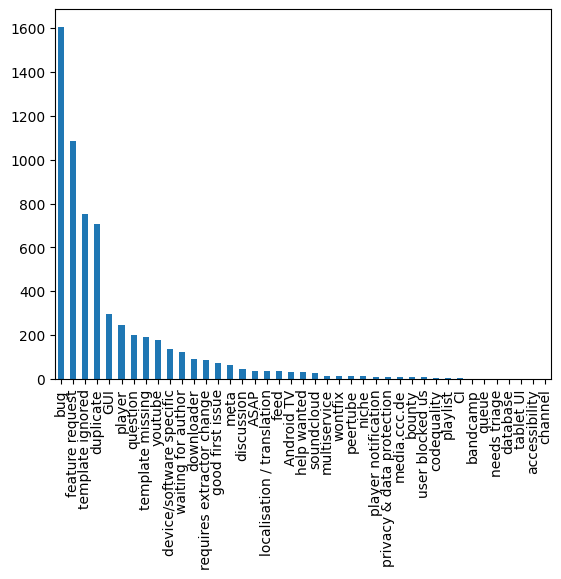

In [32]:
parsed_labels = [literal_eval(label_list) for idx, label_list in df_issues["labels"].items()] #parse labels
flattened_labels = [Label(**item) for item in itertools.chain.from_iterable(parsed_labels)] # flatten and convert to Label
labels_count = pd.Series(item.name for item in flattened_labels).value_counts()
labels_count.plot(kind="bar",)

Text(0.5, 1.0, 'Average time to complete issues')

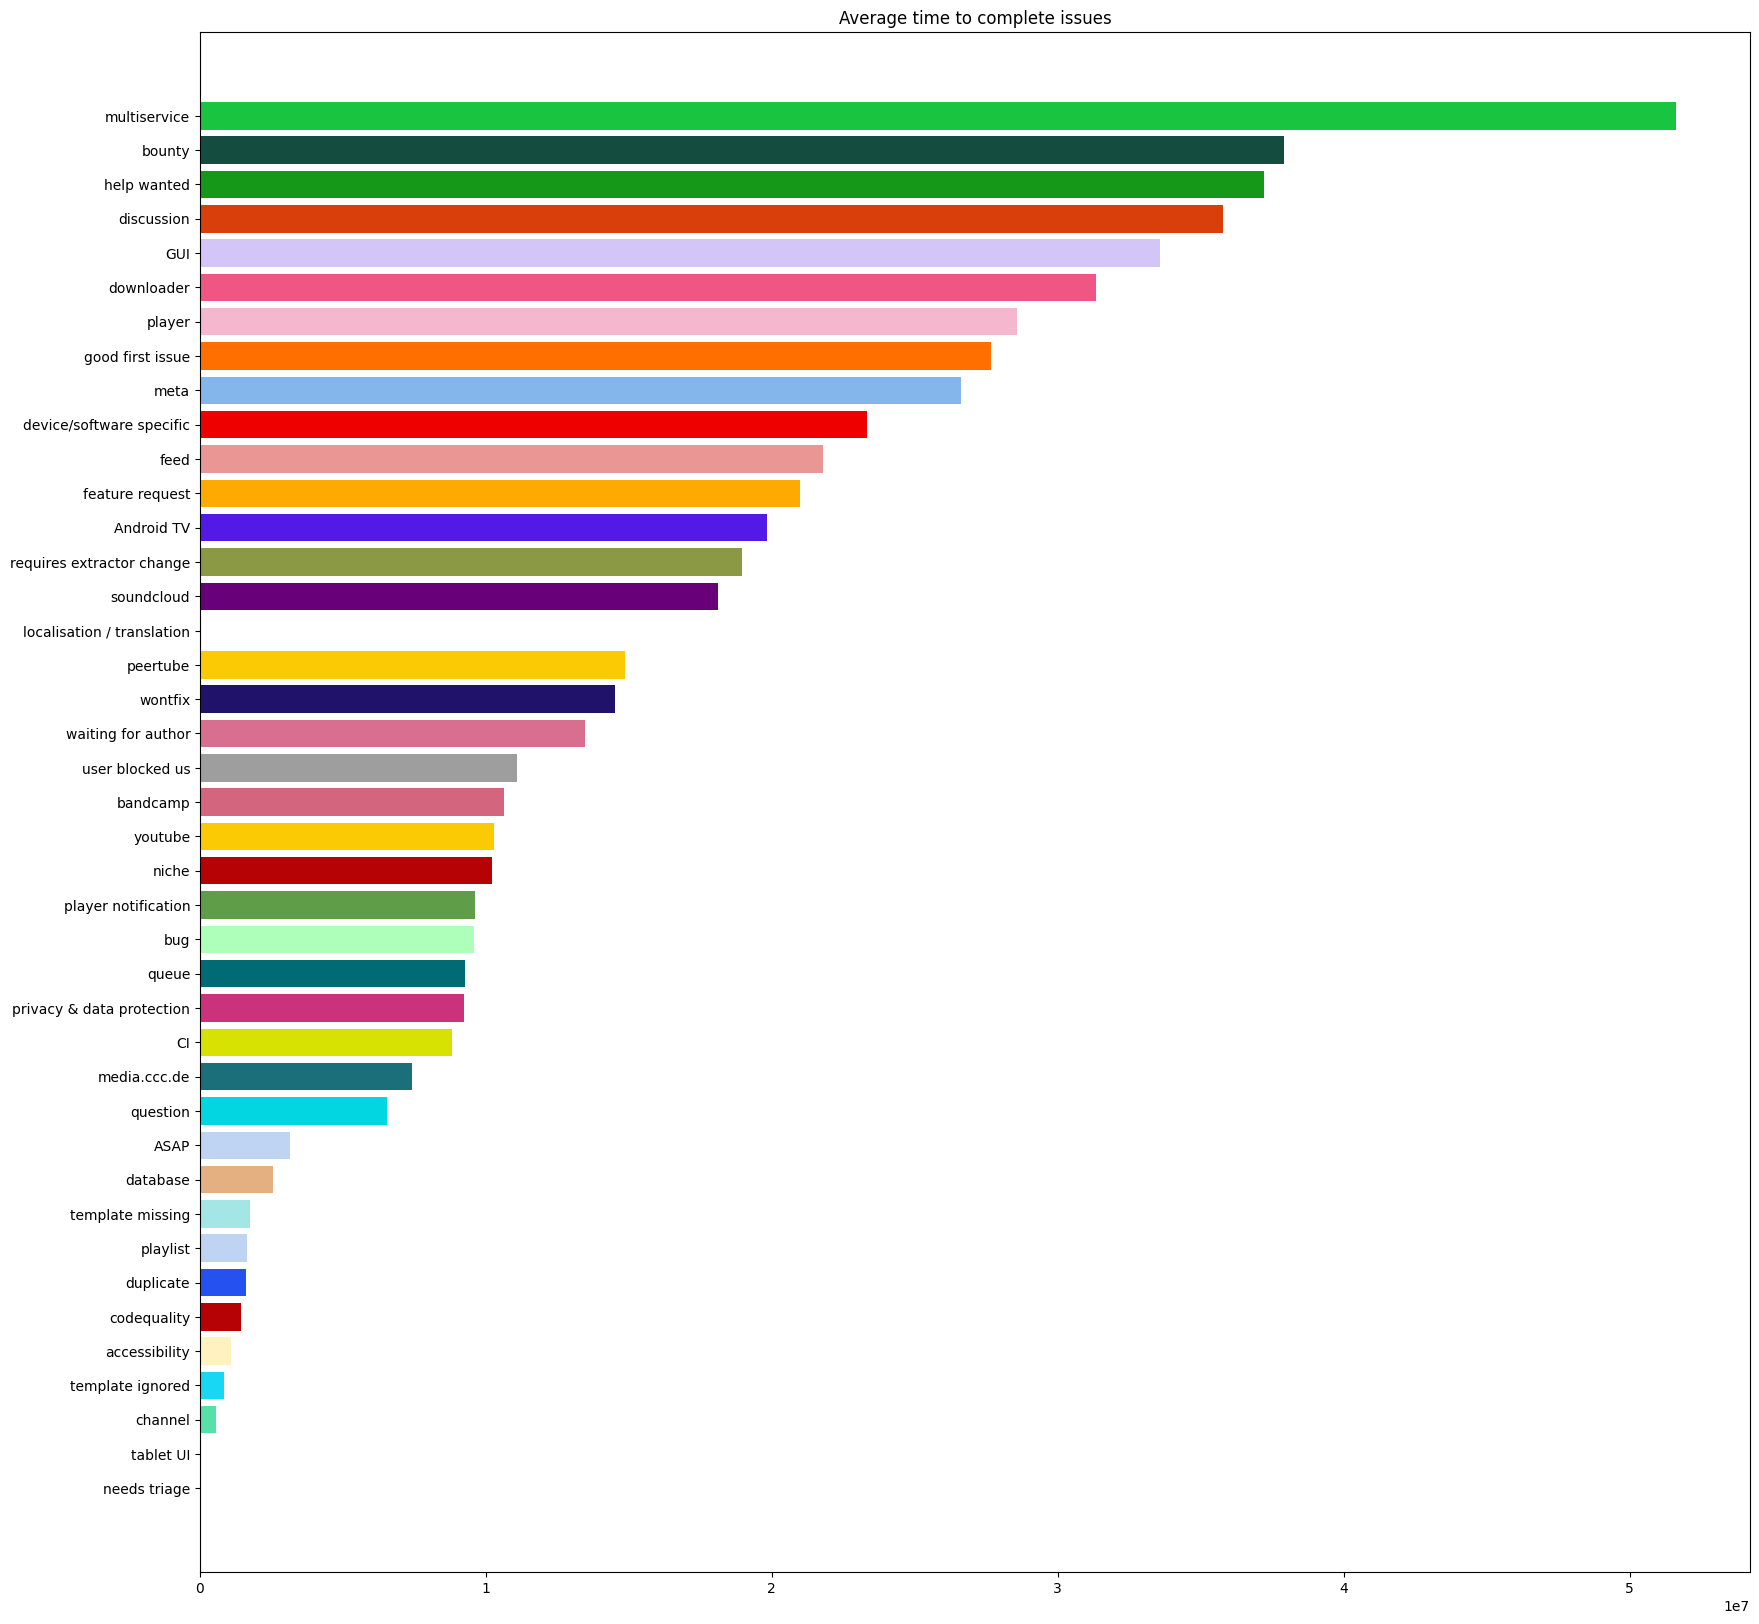

In [83]:
df_label_means = pd.DataFrame()
for tag in TAGS:
    mean = df_issues.loc[df_issues["labels"].str.contains(tag.node_id)]["time_to_complete"].mean()
    std = df_issues.loc[df_issues["labels"].str.contains(tag.node_id)]["time_to_complete"].std()
    df_label_means = pd.concat([df_label_means, pd.DataFrame.from_records([{"label": tag.name, "time_to_complete_avg": mean, "time_to_complete_std": std}])], ignore_index=True)

In [ ]:
list_df_issues_no_outliers = []
for tag in TAGS:
    mean, std = df_label_means.loc[df_label_means["label"] == tag.name]
    df = 